In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("C:/Users/Krishna/Desktop/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [4]:
print("\nDataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (70692, 22)

First 5 rows:
    Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0

In [5]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [9]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("\nLogistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))


Logistic Regression Results:
[[7699 2902]
 [2420 8187]]
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10601
         1.0       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208

Accuracy: 0.7490569596378726


In [11]:
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Classifier Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classifier Results:
[[7429 3172]
 [2378 8229]]
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     10601
         1.0       0.72      0.78      0.75     10607

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208

Accuracy: 0.738306299509619


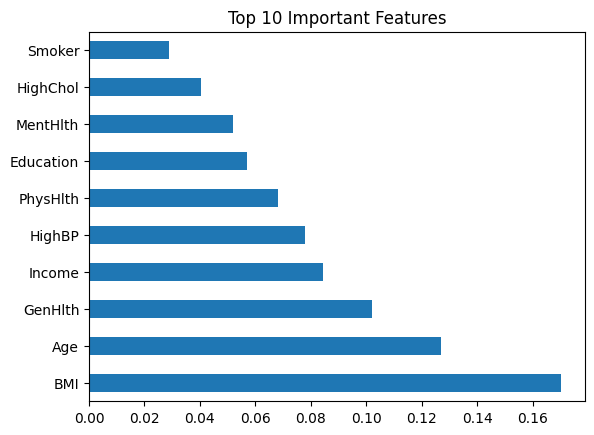

In [12]:
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

In [13]:
print("\nConclusion:")
print("- Both models performed decently well.")
print("- Random Forest gave slightly better results.")
print("- Key features influencing the disease risk were identified.")


Conclusion:
- Both models performed decently well.
- Random Forest gave slightly better results.
- Key features influencing the disease risk were identified.


In [ ]:
# End of Project